<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.
 

Uses of PCA: 

It is used to find inter-relation between variables in the data.
It is used to interpret and visualize data.
The number of variables is decreasing it makes further analysis simpler.
It’s often used to visualize genetic distance and relatedness between populations.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/data%20for%20MEGA/MEGA_20f.csv'
dataset = pd.read_csv(data)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 20) # number of features after PCA

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print("Shape of train:",X_train.shape)
print("Shape of train:",X_test.shape)

Shape of train: (72662, 20)
Shape of train: (35789, 20)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=10)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[ 1001  1193    71   705   937]
 [  500 10141  1164   859   307]
 [   23  1910  4973    58    43]
 [  376  1647   112  3235   143]
 [  647   430   104   211  4999]]
              precision    recall  f1-score   support

          N1       0.39      0.26      0.31      3907
          N2       0.66      0.78      0.72     12971
          N3       0.77      0.71      0.74      7007
           R       0.64      0.59      0.61      5513
           W       0.78      0.78      0.78      6391

    accuracy                           0.68     35789
   macro avg       0.65      0.62      0.63     35789
weighted avg       0.67      0.68      0.67     35789

Accurecy:  0.6803487104976389


array([0.64909519, 0.1842329 ])

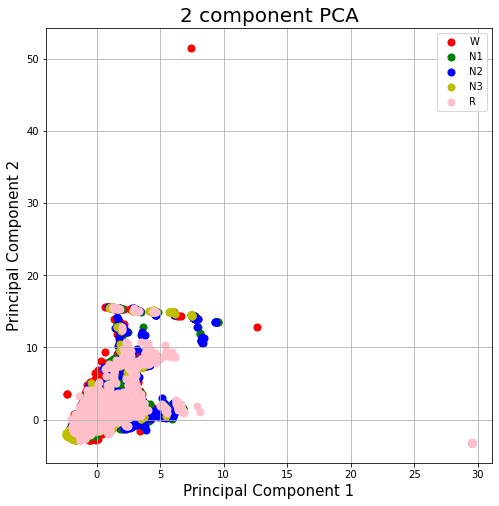

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# load dataset into Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/data%20for%20MEGA/MEGA_20f.csv')

from sklearn.preprocessing import StandardScaler
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, df[['Sleep_Stage']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['W','N1','N2','N3','R']
colors = ['r', 'g', 'b','y','pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sleep_Stage'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca.explained_variance_ratio_
